# Task 2: Programming Assignment: Implementing a GAN on MNIST

reference: https://jaketae.github.io/study/pytorch-gan/

In [2]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# config
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
hidden_size = 256
latent_size = 100 # z-noise dimension
image_size = 784
batch_size = 32
num_epochs = 20
lr = 0.0002
dropout = 0.3
print_interval = 500 # for displaying loss
show_interval = num_epochs // 5 # for displaying images

In [3]:
# importing data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5)),
])

dataset = datasets.MNIST(root="./data", download=True, transform=transform)
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [4]:
# classes
# 3 layers
generator = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh(),
).to(device)

# 3 layers
discriminator = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(dropout),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(dropout),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid(),
).to(device)

# weight initialization following DCGAN (Normal(0, 0.02))
def weights_init_normal(m):
    classname = m.__class__.__name__ # name of class "Linear"
    if classname.find('Linear') != -1: # if Linear class is found
        nn.init.normal_(m.weight.data, mean=0.0, std=0.02)
        if m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)

generator.apply(weights_init_normal)
discriminator.apply(weights_init_normal)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): LeakyReLU(negative_slope=0.2)
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=256, out_features=1, bias=True)
  (7): Sigmoid()
)

In [5]:
# criterion
loss_fn = nn.BCELoss() # new loss for Gen with label = 1 for fake image: # = 
D_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
G_optimizer = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
total_step = len(data_loader)

In [6]:
def zero_grad():
    D_optimizer.zero_grad()
    G_optimizer.zero_grad()

real_labels = torch.full((batch_size, 1), 0.9, device=device) # label smoothing
fake_labels = torch.zeros(batch_size, 1, device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [1/20], Step [500/1875], d_loss: 1.1850, g_loss: 0.9675, D(x): 0.45, D(G(z)): 0.31
Epoch [1/20], Step [1000/1875], d_loss: 0.7914, g_loss: 1.8075, D(x): 0.70, D(G(z)): 0.14
Epoch [1/20], Step [1500/1875], d_loss: 0.5977, g_loss: 2.0331, D(x): 0.76, D(G(z)): 0.08


  5%|▌         | 1/20 [00:33<10:38, 33.60s/it]

Epoch [2/20], Step [500/1875], d_loss: 0.5752, g_loss: 2.9052, D(x): 0.78, D(G(z)): 0.08
Epoch [2/20], Step [1000/1875], d_loss: 0.5540, g_loss: 3.2652, D(x): 0.78, D(G(z)): 0.07
Epoch [2/20], Step [1500/1875], d_loss: 0.5977, g_loss: 2.9284, D(x): 0.81, D(G(z)): 0.07


 10%|█         | 2/20 [01:07<10:12, 34.03s/it]

Epoch [3/20], Step [500/1875], d_loss: 0.5440, g_loss: 3.6542, D(x): 0.81, D(G(z)): 0.09
Epoch [3/20], Step [1000/1875], d_loss: 0.6091, g_loss: 2.4490, D(x): 0.74, D(G(z)): 0.07
Epoch [3/20], Step [1500/1875], d_loss: 0.5524, g_loss: 2.7732, D(x): 0.79, D(G(z)): 0.08


 15%|█▌        | 3/20 [01:43<09:47, 34.57s/it]

Epoch [4/20], Step [500/1875], d_loss: 0.5352, g_loss: 3.6875, D(x): 0.82, D(G(z)): 0.08
Epoch [4/20], Step [1000/1875], d_loss: 0.5884, g_loss: 2.5908, D(x): 0.80, D(G(z)): 0.09
Epoch [4/20], Step [1500/1875], d_loss: 0.6187, g_loss: 2.6850, D(x): 0.70, D(G(z)): 0.05


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0000001].


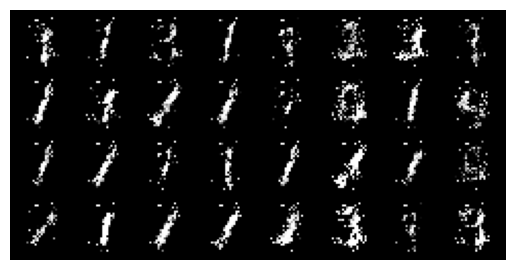

 20%|██        | 4/20 [02:23<09:50, 36.90s/it]

Epoch [5/20], Step [500/1875], d_loss: 0.7939, g_loss: 2.5381, D(x): 0.71, D(G(z)): 0.09
Epoch [5/20], Step [1000/1875], d_loss: 0.6970, g_loss: 2.3354, D(x): 0.83, D(G(z)): 0.23
Epoch [5/20], Step [1500/1875], d_loss: 0.7555, g_loss: 2.4846, D(x): 0.68, D(G(z)): 0.13


 25%|██▌       | 5/20 [03:06<09:48, 39.20s/it]

Epoch [6/20], Step [500/1875], d_loss: 0.8181, g_loss: 1.9209, D(x): 0.71, D(G(z)): 0.17
Epoch [6/20], Step [1000/1875], d_loss: 0.6073, g_loss: 3.1265, D(x): 0.77, D(G(z)): 0.10
Epoch [6/20], Step [1500/1875], d_loss: 0.6546, g_loss: 2.5195, D(x): 0.69, D(G(z)): 0.12


 30%|███       | 6/20 [03:47<09:17, 39.80s/it]

Epoch [7/20], Step [500/1875], d_loss: 0.9711, g_loss: 1.5169, D(x): 0.68, D(G(z)): 0.24
Epoch [7/20], Step [1000/1875], d_loss: 1.0403, g_loss: 1.1260, D(x): 0.54, D(G(z)): 0.13
Epoch [7/20], Step [1500/1875], d_loss: 0.9613, g_loss: 1.0804, D(x): 0.61, D(G(z)): 0.18


 35%|███▌      | 7/20 [04:26<08:30, 39.27s/it]

Epoch [8/20], Step [500/1875], d_loss: 0.6164, g_loss: 3.2295, D(x): 0.83, D(G(z)): 0.18
Epoch [8/20], Step [1000/1875], d_loss: 0.8403, g_loss: 2.9209, D(x): 0.89, D(G(z)): 0.32
Epoch [8/20], Step [1500/1875], d_loss: 0.8934, g_loss: 2.0949, D(x): 0.74, D(G(z)): 0.27


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


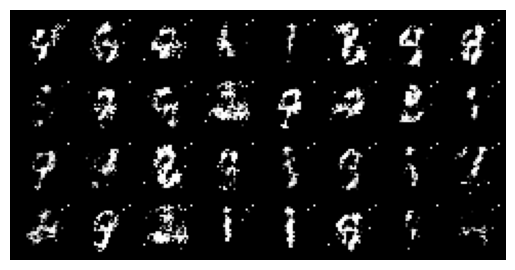

 40%|████      | 8/20 [05:02<07:39, 38.32s/it]

Epoch [9/20], Step [500/1875], d_loss: 0.8341, g_loss: 2.1608, D(x): 0.83, D(G(z)): 0.31
Epoch [9/20], Step [1000/1875], d_loss: 0.8051, g_loss: 2.0094, D(x): 0.75, D(G(z)): 0.21
Epoch [9/20], Step [1500/1875], d_loss: 0.8678, g_loss: 2.0762, D(x): 0.69, D(G(z)): 0.17


 45%|████▌     | 9/20 [05:33<06:37, 36.15s/it]

Epoch [10/20], Step [500/1875], d_loss: 0.8215, g_loss: 2.2541, D(x): 0.70, D(G(z)): 0.17
Epoch [10/20], Step [1000/1875], d_loss: 0.9100, g_loss: 1.8172, D(x): 0.62, D(G(z)): 0.12
Epoch [10/20], Step [1500/1875], d_loss: 0.7013, g_loss: 2.1440, D(x): 0.74, D(G(z)): 0.17


 50%|█████     | 10/20 [06:07<05:54, 35.49s/it]

Epoch [11/20], Step [500/1875], d_loss: 0.8985, g_loss: 1.6909, D(x): 0.66, D(G(z)): 0.22
Epoch [11/20], Step [1000/1875], d_loss: 0.9498, g_loss: 1.7377, D(x): 0.59, D(G(z)): 0.11
Epoch [11/20], Step [1500/1875], d_loss: 0.9087, g_loss: 1.5313, D(x): 0.67, D(G(z)): 0.17


 55%|█████▌    | 11/20 [06:50<05:40, 37.78s/it]

Epoch [12/20], Step [500/1875], d_loss: 1.1882, g_loss: 1.2680, D(x): 0.61, D(G(z)): 0.35
Epoch [12/20], Step [1000/1875], d_loss: 1.0218, g_loss: 1.4260, D(x): 0.63, D(G(z)): 0.16
Epoch [12/20], Step [1500/1875], d_loss: 0.9670, g_loss: 1.3379, D(x): 0.57, D(G(z)): 0.15


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


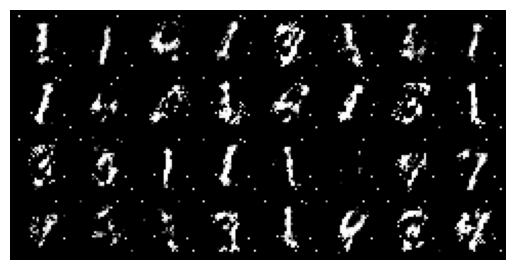

 60%|██████    | 12/20 [07:29<05:03, 37.94s/it]

Epoch [13/20], Step [500/1875], d_loss: 0.8950, g_loss: 1.6901, D(x): 0.66, D(G(z)): 0.21
Epoch [13/20], Step [1000/1875], d_loss: 1.0455, g_loss: 1.7053, D(x): 0.58, D(G(z)): 0.22
Epoch [13/20], Step [1500/1875], d_loss: 0.9051, g_loss: 1.8670, D(x): 0.67, D(G(z)): 0.22


 65%|██████▌   | 13/20 [08:12<04:36, 39.55s/it]

Epoch [14/20], Step [500/1875], d_loss: 0.7960, g_loss: 2.2651, D(x): 0.76, D(G(z)): 0.24
Epoch [14/20], Step [1000/1875], d_loss: 0.9540, g_loss: 1.6228, D(x): 0.60, D(G(z)): 0.19
Epoch [14/20], Step [1500/1875], d_loss: 0.9395, g_loss: 1.5597, D(x): 0.61, D(G(z)): 0.16


 70%|███████   | 14/20 [08:49<03:52, 38.80s/it]

Epoch [15/20], Step [500/1875], d_loss: 1.0478, g_loss: 1.2590, D(x): 0.64, D(G(z)): 0.29
Epoch [15/20], Step [1000/1875], d_loss: 0.8704, g_loss: 1.6358, D(x): 0.73, D(G(z)): 0.27
Epoch [15/20], Step [1500/1875], d_loss: 0.9425, g_loss: 1.4642, D(x): 0.73, D(G(z)): 0.30


 75%|███████▌  | 15/20 [09:21<03:03, 36.80s/it]

Epoch [16/20], Step [500/1875], d_loss: 0.8821, g_loss: 2.0180, D(x): 0.72, D(G(z)): 0.23
Epoch [16/20], Step [1000/1875], d_loss: 0.8754, g_loss: 1.9213, D(x): 0.64, D(G(z)): 0.15
Epoch [16/20], Step [1500/1875], d_loss: 1.0379, g_loss: 2.0592, D(x): 0.55, D(G(z)): 0.14


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


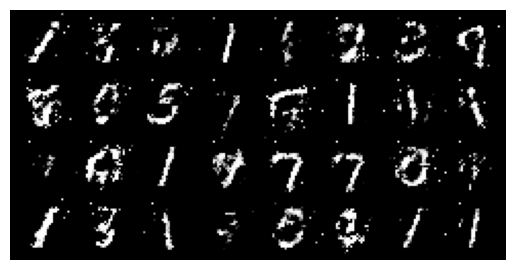

 80%|████████  | 16/20 [09:54<02:23, 35.78s/it]

Epoch [17/20], Step [500/1875], d_loss: 1.0360, g_loss: 1.8186, D(x): 0.65, D(G(z)): 0.27
Epoch [17/20], Step [1000/1875], d_loss: 0.9329, g_loss: 1.5524, D(x): 0.61, D(G(z)): 0.14
Epoch [17/20], Step [1500/1875], d_loss: 0.9756, g_loss: 1.5972, D(x): 0.61, D(G(z)): 0.19


 85%|████████▌ | 17/20 [10:32<01:49, 36.45s/it]

Epoch [18/20], Step [500/1875], d_loss: 1.0562, g_loss: 1.5009, D(x): 0.55, D(G(z)): 0.16
Epoch [18/20], Step [1000/1875], d_loss: 0.8985, g_loss: 1.9663, D(x): 0.75, D(G(z)): 0.32
Epoch [18/20], Step [1500/1875], d_loss: 0.9251, g_loss: 1.3478, D(x): 0.66, D(G(z)): 0.25


 90%|█████████ | 18/20 [11:23<01:21, 40.57s/it]

Epoch [19/20], Step [500/1875], d_loss: 0.8652, g_loss: 1.4969, D(x): 0.66, D(G(z)): 0.19
Epoch [19/20], Step [1000/1875], d_loss: 0.9597, g_loss: 1.7327, D(x): 0.64, D(G(z)): 0.22
Epoch [19/20], Step [1500/1875], d_loss: 1.0991, g_loss: 1.4310, D(x): 0.64, D(G(z)): 0.28


 95%|█████████▌| 19/20 [12:05<00:41, 41.16s/it]

Epoch [20/20], Step [500/1875], d_loss: 0.9678, g_loss: 1.6909, D(x): 0.64, D(G(z)): 0.27
Epoch [20/20], Step [1000/1875], d_loss: 1.0620, g_loss: 1.6881, D(x): 0.57, D(G(z)): 0.26
Epoch [20/20], Step [1500/1875], d_loss: 0.8978, g_loss: 1.7277, D(x): 0.64, D(G(z)): 0.23


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0000001].


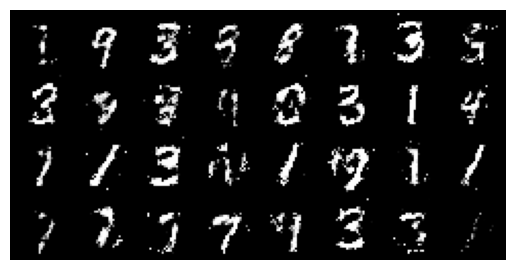

100%|██████████| 20/20 [12:45<00:00, 38.28s/it]


In [8]:
# training loop
from tqdm import tqdm
d_losses = []
g_losses = []
for epoch in tqdm(range(num_epochs)):
    for i, (images, _) in enumerate(data_loader): # 1:1 ration for D and G training for now
        images = images.reshape(batch_size, -1).to(device) # batch of images (x) from MNIST
        # first train discriminator
        D_optimizer.zero_grad()
        # real images D(x)
        output = discriminator(images)
        d_loss_real = loss_fn(output, real_labels)
        real_score = output.mean().item()
        # fake images D(G(z))
        noise = torch.randn(batch_size, latent_size, device=device) # z
        fake_images = generator(noise) # G(z)
        output = discriminator(fake_images) # D(G(z))
        d_loss_fake = loss_fn(output, fake_labels) 
        fake_score = output.mean().item()
        # total discriminator loss
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        D_optimizer.step()

        # train generator
        G_optimizer.zero_grad()
        noise = torch.randn(batch_size, latent_size, device=device)
        fake_images = generator(noise)
        output = discriminator(fake_images) # -[1*log(p) + 0*log(1-p)] = -log(p)
        g_loss = loss_fn(output, real_labels) # we want D(G(z)) = 1 (classified as real) so we use real labels to minimize -log(D(G(z))) 
        g_loss.backward()
        G_optimizer.step()

        # for plotting purposes
        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())

        # print updates
        if (i+1) % print_interval == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}], "
                f"Step [{i+1}/{total_step}], "
                f"d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, "
                f"D(x): {real_score:.2f}, D(G(z)): {fake_score:.2f}"
            )
    if (epoch + 1) % show_interval == 0:
        fake_images = fake_images.reshape(batch_size, 1, 28, 28).detach()
        plt.imshow(make_grid(fake_images).permute(1, 2, 0).cpu().numpy())
        plt.axis("off")
        plt.show()

# epoch_d_losses = []
# epoch_g_losses = []
# batches_per_epoch = len(dataloader)
# for e in range(num_epochs):
#     start = e * batches_per_epoch
#     end   = start + batches_per_epoch
#     epoch_d_losses.append(np.mean(d_losses[start:end]))
#     epoch_g_losses.append(np.mean(g_losses[start:end]))


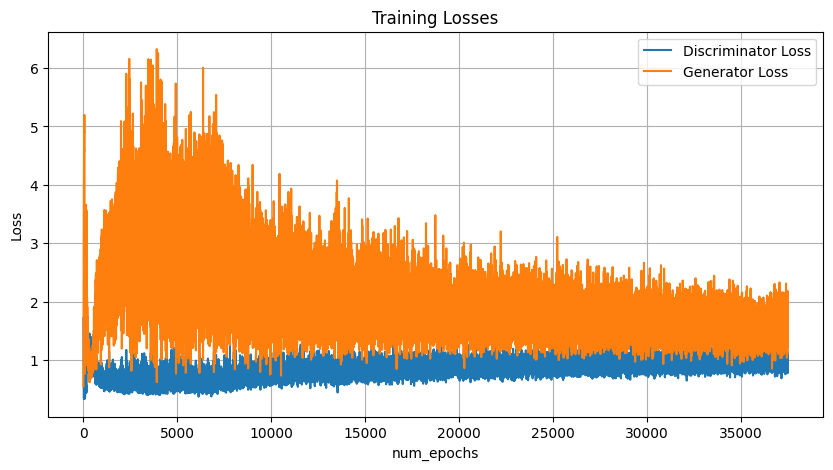

In [11]:
# plot loss curves (maybe do it with epochs next time idiot)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel("num_epochs")
plt.ylabel("Loss")
plt.title("Training Losses")
plt.legend()
plt.grid(True)
plt.show()


**my GAN vs. Reference GAN**

- **Batch Size**  
  - **Yours:** 32  
  - **Reference:** 100  
  - Smaller batches can introduce noisier gradient estimates, which sometimes add variety but may slow convergence.

- **Learning Rate & Optimizer**  
  - Both use Adam at 2e‑4 with β=(0.5, 0.999), so training dynamics are otherwise matched.
  - both use similar architectures (MLP) with 5 hidden layers and neurons of 100 -> 128 -> 256 -> 512 -> 1024 -> 768 
  - i don't use batchnorm but reference code does use, we both use dropout

- **Label Smoothing**  
  - **Yours:** Real labels smoothed to 0.9  
  - **Reference:** Hard 1.0  
  - Smoothing can regularize D, making the generator’s task a bit harder but often yielding more stable training.

- **Observed Effects**  
  - slightly “softer” discriminator feedback early on (thanks to smoothing) and more varied samples (thanks to smaller batches), at the cost of a bit more noise and slower crispness in my implementation
  - mostly samples for both should be very similar



# Task 3: Experimenting with GAN Training Issues

## Gradient Vanishing

### initial (D's LR boosted, no label smoothing, saturated loss for G -> original paper)

In [18]:
# config
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
hidden_size = 256
latent_size = 100  # z-noise dimension
image_size = 784
batch_size = 32
num_epochs = 3 # lower epochs cuz less time bro
lr = 0.0002
dropout = 0.3
print_interval = 500
show_interval = num_epochs // 5

# importing data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5)),
])
dataset = datasets.MNIST(root="./data", download=True, transform=transform)
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)

# 3-layer Generator (initial)
generator_T1_init = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh(),
).to(device)

# 3-layer Discriminator (initial, no dropout so D overpowers)
discriminator_T1_init = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid(),
).to(device)

# weight initialization
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        nn.init.normal_(m.weight.data, mean=0.0, std=0.02)
        if m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)

generator_T1_init.apply(weights_init_normal)
discriminator_T1_init.apply(weights_init_normal)

# criterion
loss_fn = nn.BCELoss()

# give D a much higher LR and extra steps to force vanishing
D_optimizer_T1_init = torch.optim.Adam(discriminator_T1_init.parameters(), lr=lr * 5, betas=(0.5, 0.999))
G_optimizer_T1_init = torch.optim.Adam(generator_T1_init.parameters(), lr=lr, betas=(0.5, 0.999))

# fixed labels (no smoothing here to make D fully confident)
real_labels = torch.ones(batch_size, 1, device=device)
fake_labels = torch.zeros(batch_size, 1, device=device)


[Vanishing] Epoch [1/3], Step [500], d_loss: 0.0000, g_loss: 0.0000, D(x): 1.00, D(G(z)): 0.00
[Vanishing] Epoch [1/3], Step [1000], d_loss: 0.0000, g_loss: 0.0000, D(x): 1.00, D(G(z)): 0.00
[Vanishing] Epoch [1/3], Step [1500], d_loss: 0.0000, g_loss: 0.0000, D(x): 1.00, D(G(z)): 0.00


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10008075..0.113460205].


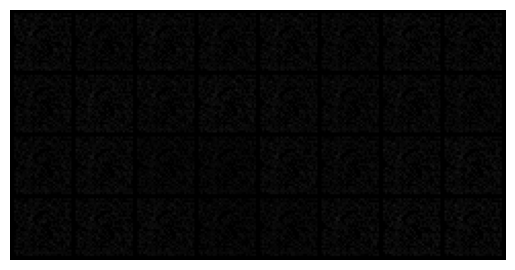

[Vanishing] Epoch [2/3], Step [500], d_loss: 0.0000, g_loss: 0.0000, D(x): 1.00, D(G(z)): 0.00
[Vanishing] Epoch [2/3], Step [1000], d_loss: 0.0000, g_loss: 0.0000, D(x): 1.00, D(G(z)): 0.00
[Vanishing] Epoch [2/3], Step [1500], d_loss: 0.0000, g_loss: 0.0000, D(x): 1.00, D(G(z)): 0.00


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09957278..0.11466131].


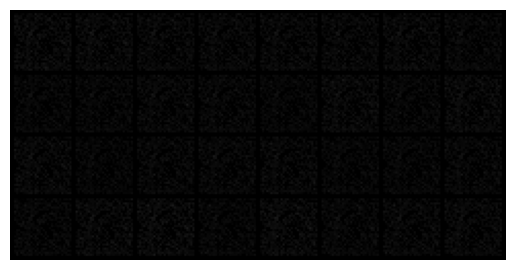

[Vanishing] Epoch [3/3], Step [500], d_loss: 0.0000, g_loss: 0.0000, D(x): 1.00, D(G(z)): 0.00
[Vanishing] Epoch [3/3], Step [1000], d_loss: 0.0000, g_loss: 0.0000, D(x): 1.00, D(G(z)): 0.00
[Vanishing] Epoch [3/3], Step [1500], d_loss: 0.0000, g_loss: 0.0000, D(x): 1.00, D(G(z)): 0.00


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11527643..0.112956464].


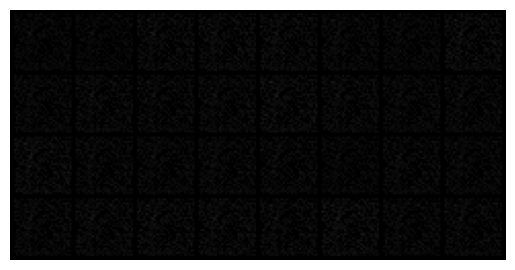

In [21]:
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)

        # train D multiple times per G
        for _ in range(5):
            noise = torch.randn(batch_size, latent_size, device=device)
            fake_images = generator_T1_init(noise).detach()

            D_optimizer_T1_init.zero_grad()
            output_real = discriminator_T1_init(images)
            output_fake = discriminator_T1_init(fake_images)
            d_loss_real = loss_fn(output_real, real_labels)
            d_loss_fake = loss_fn(output_fake, fake_labels)
            real_score = output_real.mean().item()
            fake_score = output_fake.mean().item()
            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            D_optimizer_T1_init.step()

        # train G once with saturating loss (log(1−D(G)) → vanishing gradients)
        noise2 = torch.randn(batch_size, latent_size, device=device)
        G_optimizer_T1_init.zero_grad()
        output = discriminator_T1_init(generator_T1_init(noise2))
        g_loss = loss_fn(output, fake_labels)
        g_loss.backward()
        G_optimizer_T1_init.step()

        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())

        if (i + 1) % print_interval == 0:
            print(f"[Vanishing] Epoch [{epoch+1}/{num_epochs}], Step [{i+1}], "
                  f"d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, "
                    f"D(x): {real_score:.2f}, D(G(z)): {fake_score:.2f}")

    # show failing samples
    # if (epoch + 1) % show_interval == 0:
    with torch.no_grad():
        sample = generator_T1_init(torch.randn(batch_size, latent_size, device=device))
    grid = make_grid(sample.view(-1,1,28,28), nrow=8)
    plt.imshow(grid.permute(1,2,0).cpu())
    plt.axis("off")
    plt.show()

### mitigation (equal LR for both, non-sat loss for G, label smoothing for D) -> kinda the task 2 so not re-running for now

In [ ]:
# config (same as above)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
hidden_size = 256
latent_size = 100  # z-noise dimension
image_size = 784
batch_size = 32
num_epochs = 10
lr = 0.0002
print_interval = 500
show_interval = num_epochs // 5

# importing data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)),
])
dataset = datasets.MNIST(root="./data", download=True, transform=transform)
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)

# 3-layer Generator (mitigated)
generator_T1_mit = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh(),
).to(device)

# 3-layer Discriminator (mitigated)
discriminator_T1_mit = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid(),
).to(device)

# same weight init
generator_T1_mit.apply(weights_init_normal)
discriminator_T1_mit.apply(weights_init_normal)

loss_fn = nn.BCELoss()

# equal LR now
D_optimizer_T1_mit = torch.optim.Adam(discriminator_T1_mit.parameters(), lr=lr, betas=(0.5, 0.999))
G_optimizer_T1_mit = torch.optim.Adam(generator_T1_mit.parameters(), lr=lr, betas=(0.5, 0.999))

# label smoothing for real labels → 0.9
real_labels_smooth = torch.full((batch_size, 1), 0.9, device=device)
fake_labels_zero   = torch.zeros(batch_size, 1, device=device)

In [ ]:
d_losses_m, g_losses_m = [], []

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)

        # train D once
        noise = torch.randn(batch_size, latent_size, device=device)
        fake_images = generator_T1_mit(noise).detach()

        D_optimizer_T1_mit.zero_grad()
        # d_loss_real = loss_fn(discriminator_T1_mit(images), real_labels_smooth)
        # d_loss_fake = loss_fn(discriminator_T1_mit(fake_images), fake_labels_zero)
        output_real = discriminator_T1_init(images)
        output_fake = discriminator_T1_init(fake_images)
        d_loss_real = loss_fn(output_real, real_labels_smooth)
        d_loss_fake = loss_fn(output_fake, fake_labels_zero)
        real_score = output_real.mean().item()
        fake_score = output_fake.mean().item()
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        D_optimizer_T1_mit.step()

        # train G with non-saturating loss: maximize log(D(G(z))) → minimize -log(D(G(z)))
        noise2 = torch.randn(batch_size, latent_size, device=device)
        G_optimizer_T1_mit.zero_grad()
        pred = discriminator_T1_mit(generator_T1_mit(noise2))
        g_loss = -torch.log(pred).mean()
        g_loss.backward()
        G_optimizer_T1_mit.step()

        d_losses_m.append(d_loss.item())
        g_losses_m.append(g_loss.item())

        if (i + 1) % print_interval == 0:
            print(f"[Mitigated] Epoch [{epoch+1}/{num_epochs}], Step [{i+1}], "
                  f"d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}"
                  f"D(x): {real_score:.2f}, D(G(z)): {fake_score:.2f}")

    # show improved samples
    if (epoch + 1) % show_interval == 0:
        with torch.no_grad():
            sample = generator_T1_mit(torch.randn(batch_size, latent_size, device=device))
        grid = make_grid(sample.view(-1,1,28,28), nrow=8, normalize=True)
        plt.imshow(grid.permute(1,2,0).cpu())
        plt.axis("off")
        plt.show()

## Mode Collapse

### initial (G's LR boosted, heavier G dropout)

In [ ]:
# config
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
hidden_size = 256
latent_size = 100  # z-noise dimension
image_size = 784
batch_size = 32
num_epochs = 10
lr = 0.0002
print_interval = 500
show_interval = num_epochs // 5

# importing data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)),
])
dataset = datasets.MNIST(root="./data", download=True, transform=transform)
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)

# 3-layer Generator (initial)
generator_T2_init = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh(),
).to(device)

# 3-layer Discriminator (initial: heavier dropout to weaken it)
discriminator_T2_init = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.5),        # heavy dropout → weak D
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.5),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid(),
).to(device)

# weight initialization
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        nn.init.normal_(m.weight.data, mean=0.0, std=0.02)
        if m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)

generator_T2_init.apply(weights_init_normal)
discriminator_T2_init.apply(weights_init_normal)

# criterion
loss_fn = nn.BCELoss()

# boost G’s LR significantly to provoke collapse
D_optimizer_T2_init = torch.optim.Adam(discriminator_T2_init.parameters(), lr=lr, betas=(0.5, 0.999))
G_optimizer_T2_init = torch.optim.Adam(generator_T2_init.parameters(), lr=lr * 10, betas=(0.5, 0.999))

real_labels = torch.ones(batch_size, 1, device=device)
fake_labels = torch.zeros(batch_size, 1, device=device)


In [ ]:
from torchvision.utils import make_grid, save_image

d_losses, g_losses = [], []

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)

        # train D
        noise = torch.randn(batch_size, latent_size, device=device)
        fake_images = generator_T2_init(noise).detach()

        D_optimizer_T2_init.zero_grad()
        output_real = discriminator_T1_init(images)
        output_fake = discriminator_T1_init(fake_images)
        d_loss_real = loss_fn(output_real, real_labels)
        d_loss_fake = loss_fn(output_fake, fake_labels)
        real_score = output_real.mean().item()
        fake_score = output_fake.mean().item()
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        D_optimizer_T2_init.step()

        # train G (standard non-sat loss)
        noise2 = torch.randn(batch_size, latent_size, device=device)
        G_optimizer_T2_init.zero_grad()
        output = discriminator_T2_init(generator_T2_init(noise2))
        g_loss = loss_fn(output, real_labels)
        g_loss.backward()
        G_optimizer_T2_init.step()

        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())

        if (i + 1) % print_interval == 0:
            print(f"[Collapse] Epoch [{epoch+1}/{num_epochs}], Step [{i+1}], "
                  f"d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, "
                  f"D(x): {real_score:.2f}, D(G(z)): {fake_score:.2f}")

    # save grid to inspect diversity
    with torch.no_grad():
        sample = generator_T2_init(torch.randn(16, latent_size, device=device)).view(-1,1,28,28)
    grid = make_grid(sample, nrow=4)
    save_image(grid, f"collapse_initial_epoch{epoch+1}.png")
    # display the tensor grid inline
    plt.figure(figsize=(4,4))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
    plt.show()


### mitigated (mini-batch for D, feature matching for G)

In [ ]:
# config (same)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
hidden_size = 256
latent_size = 100
image_size = 784
batch_size = 32
num_epochs = 10
lr = 0.0002
print_interval = 500
show_interval = num_epochs // 5

# importing data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)),
])
dataset = datasets.MNIST(root="./data", download=True, transform=transform)
data_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)

# Generator (mitigated)
generator_T2_mit = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh(),
).to(device)

# Discriminator (mitigated: minibatch discrimination)
class DisT2Mit(nn.Module):
    def __init__(self):
        super().__init__()
        self.feat = nn.Sequential(
            nn.Linear(image_size, hidden_size),
            nn.LeakyReLU(0.2),
        )
        # minibatch feature proj
        self.mb = nn.Linear(hidden_size, 100)
        self.classifier = nn.Sequential(
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size + 100, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        h = self.feat(x)
        mb_vec = torch.sum(self.mb(h), dim=0, keepdim=True).expand_as(h)
        h_cat = torch.cat([h, mb_vec], dim=1)
        return self.classifier(h_cat)

discriminator_T2_mit = DisT2Mit().to(device)

generator_T2_mit.apply(weights_init_normal)
discriminator_T2_mit.apply(weights_init_normal)

# criterion
loss_fn = nn.BCELoss()

D_optimizer_T2_mit = torch.optim.Adam(discriminator_T2_mit.parameters(), lr=lr, betas=(0.5, 0.999))
G_optimizer_T2_mit = torch.optim.Adam(generator_T2_mit.parameters(), lr=lr, betas=(0.5, 0.999))

real_labels = torch.ones(batch_size, 1, device=device)
fake_labels = torch.zeros(batch_size, 1, device=device)

In [ ]:
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)

        # train D with minibatch discrimination
        noise = torch.randn(batch_size, latent_size, device=device)
        fake_images = generator_T2_mit(noise).detach()

        D_optimizer_T2_mit.zero_grad()
        output_real = discriminator_T1_init(images)
        output_fake = discriminator_T1_init(fake_images)
        d_loss_real = loss_fn(output_real, real_labels)
        d_loss_fake = loss_fn(output_fake, fake_labels)
        d_loss = d_loss_real + d_loss_fake
        real_score = output_real.mean().item()
        fake_score = output_fake.mean().item()
        d_loss.backward()
        D_optimizer_T2_mit.step()

        # train G with feature-matching instead of BCE
        noise2 = torch.randn(batch_size, latent_size, device=device)
        fake = generator_T2_mit(noise2)
        real_feats = discriminator_T2_mit.feat(images)
        fake_feats = discriminator_T2_mit.feat(fake)

        G_optimizer_T2_mit.zero_grad()
        fm_loss = nn.L1Loss()(fake_feats.mean(0), real_feats.mean(0))
        fm_loss.backward()
        G_optimizer_T2_mit.step()

        if (i + 1) % print_interval == 0:
            print(f"[ModeMit] Epoch [{epoch+1}/{num_epochs}], Step [{i+1}], "
                  f"d_loss: {d_loss.item():.4f}, fm_loss: {fm_loss.item():.4f}, "
                  f"D(x): {real_score:.2f}, D(G(z)): {fake_score:.2f}")

    # save grid to inspect restored diversity
    with torch.no_grad():
        sample = generator_T2_mit(torch.randn(16, latent_size, device=device)).view(-1,1,28,28)
    grid = make_grid(sample, nrow=4)
    save_image(grid, f"collapse_mitigated_epoch{epoch+1}.png")
    # display the tensor grid inline
    plt.figure(figsize=(4,4))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
    plt.show()

## Discriminator Overfitting

### initial (trains on a tiny subset so that D quickly memorizes, dropout for D)

In [ ]:
from torch.utils.data import DataLoader, Subset

# config
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
hidden_size = 256
latent_size = 100  # z-noise dimension
image_size = 784
batch_size = 32
num_epochs = 10
lr = 0.0002
print_interval = 500
show_interval = num_epochs // 5

# importing tiny subset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)),
])
full_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
subset = Subset(full_dataset, np.arange(500))  # only 500 images
data_loader = DataLoader(dataset=subset, batch_size=batch_size, shuffle=True, drop_last=True)

# 3-layer Generator
generator_T3_init = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh(),
).to(device)

# 3-layer Discriminator (initial: no dropout or reg → overfits)
discriminator_T3_init = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid(),
).to(device)

# weight init
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        nn.init.normal_(m.weight.data, mean=0.0, std=0.02)
        if m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)

generator_T3_init.apply(weights_init_normal)
discriminator_T3_init.apply(weights_init_normal)

# criterion
loss_fn = nn.BCELoss()

D_optimizer_T3_init = torch.optim.Adam(discriminator_T3_init.parameters(), lr=lr, betas=(0.5, 0.999))
G_optimizer_T3_init = torch.optim.Adam(generator_T3_init.parameters(), lr=lr, betas=(0.5, 0.999))

real_labels = torch.ones(batch_size, 1, device=device)
fake_labels = torch.zeros(batch_size, 1, device=device)


In [ ]:

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)

        # train D (will overfit quickly)
        noise = torch.randn(batch_size, latent_size, device=device)
        fake_images = generator_T3_init(noise).detach()

        D_optimizer_T3_init.zero_grad()
        output_real = discriminator_T1_init(images)
        output_fake = discriminator_T1_init(fake_images)
        d_loss_real = loss_fn(output_real, real_labels_smooth)
        d_loss_fake = loss_fn(output_fake, fake_labels_zero)
        real_score = output_real.mean().item()
        fake_score = output_fake.mean().item()
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        D_optimizer_T3_init.step()

        if (i + 1) % print_interval == 0:
            print(f"[OverfitInit] Epoch [{epoch+1}/{num_epochs}], Step [{i+1}], "
                  f"d_loss: {d_loss.item():.4f}")

    # evaluate D on same data to show overfitting
    with torch.no_grad():
        acc = discriminator_T3_init(images).mean().item()
    print(f"Discriminator memorization D(x) ~ {acc:.2f}")

    # show G samples (unlikely to improve)
    if (epoch + 1) % show_interval == 0:
        sample = generator_T3_init(torch.randn(batch_size, latent_size, device=device)).view(-1,1,28,28)
        grid = make_grid(sample, nrow=8)
        plt.imshow(grid.permute(1,2,0).cpu())
        plt.axis("off")
        plt.show()

### mitigation (adds Dropout to D and early‑stops D per epoch to prevent memorization)

In [ ]:
# config
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
hidden_size = 256
latent_size = 100  # z-noise dimension
image_size = 784
batch_size = 32
num_epochs = 10
lr = 0.0002
print_interval = 500
show_interval = num_epochs // 5

# importing tiny subset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)),
])
full_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
subset = Subset(full_dataset, np.arange(500))  # only 500 images
data_loader = DataLoader(dataset=subset, batch_size=batch_size, shuffle=True, drop_last=True)

# 3-layer Generator
generator_T3_mit = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh(),
).to(device)

# 3-layer Discriminator (mitigated: add dropout)
discriminator_T3_mit = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.4),        # dropout to regularize D
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.4),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid(),
).to(device)

# weight init
def weights_init_normal(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        nn.init.normal_(m.weight.data, mean=0.0, std=0.02)
        if m.bias is not None:
            nn.init.constant_(m.bias.data, 0.0)

generator_T3_mit.apply(weights_init_normal)
discriminator_T3_mit.apply(weights_init_normal)

# criterion
loss_fn = nn.BCELoss()

D_optimizer_T3_mit = torch.optim.Adam(discriminator_T3_mit.parameters(), lr=lr, betas=(0.5, 0.999))
G_optimizer_T3_mit = torch.optim.Adam(generator_T3_mit.parameters(), lr=lr, betas=(0.5, 0.999))

real_labels = torch.ones(batch_size, 1, device=device)
fake_labels = torch.zeros(batch_size, 1, device=device)


In [ ]:

for epoch in range(num_epochs):
    # train D only 1 batch per epoch (early-stop) to avoid memorization
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)

        noise = torch.randn(batch_size, latent_size, device=device)
        fake_images = generator_T3_mit(noise).detach()

        D_optimizer_T3_mit.zero_grad()
        d_loss = loss_fn(discriminator_T3_mit(images), real_labels) + \
                 loss_fn(discriminator_T3_mit(fake_images), fake_labels)
        d_loss.backward()
        D_optimizer_T3_mit.step()

        break  # early-stop D after 1 batch

    if (i + 1) % print_interval == 0:
        print(f"[OverfitMit] Epoch [{epoch+1}/{num_epochs}], Step [{i+1}], "
              f"d_loss: {d_loss.item():.4f}")

    # train G
    noise2 = torch.randn(batch_size, latent_size, device=device)
    G_optimizer_T3_mit.zero_grad()
    g_loss = loss_fn(discriminator_T3_mit(generator_T3_mit(noise2)), real_labels)
    g_loss.backward()
    G_optimizer_T3_mit.step()

    # evaluate D on same data to monitor generalization
    with torch.no_grad():
        acc = discriminator_T3_mit(images).mean().item()
    print(f"Discriminator generalization D(x) ~ {acc:.2f}")

    # show G samples
    if (epoch + 1) % show_interval == 0:
        sample = generator_T3_mit(torch.randn(batch_size, latent_size, device=device)).view(-1,1,28,28)
        grid = make_grid(sample, nrow=8, normalize=True)
        plt.imshow(grid.permute(1,2,0).cpu())
        plt.axis("off")
        plt.show()